In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
# Kmeans Clustering
def kmeans(df, n):
    
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df)

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]

 
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot   

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y,PC1,PC2
0,67.0,38.11,0,2,1,1,2,0,2,0,1,0,28.967043,3.806746e+01,40.317683,32.094405
1,29.0,0.00,1,2,2,2,2,2,2,2,1,1,23.833692,3.197442e-14,-21.507759,8.516612
2,22.0,0.00,0,2,2,2,2,2,2,2,1,1,23.833692,3.197442e-14,-23.225340,1.735341
3,20.0,36.56,0,2,1,1,2,0,2,1,1,0,28.967043,3.806746e+01,27.724366,-13.195695
4,21.0,0.00,1,2,2,2,2,2,2,2,1,1,23.833692,3.197442e-14,-23.469053,0.761350


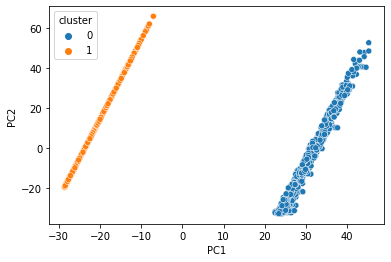

In [8]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]
df_cluster, plot = kmeans(df_cluster, 2)

df_cluster.head()

In [8]:
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,0,2,1,1,2,0,2,0,1,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1,1


In [10]:
# Visualize cluster 1
df_cluster[df_cluster['cluster'] == 0]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y
1,29.00,0.0,1,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
2,22.00,0.0,0,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
4,21.00,0.0,1,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
5,22.00,0.0,0,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
6,19.00,0.0,0,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.40,0.0,2,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
1481,0.83,0.0,2,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
1482,3.00,0.0,2,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14
1483,4.00,0.0,2,2,2,2,2,2,2,2,1,0,23.833692,3.552714e-14


In [11]:
# Visualize cluster 2 
df_cluster[df_cluster['cluster'] == 1]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y
0,67.0,38.11,0,2,1,1,2,0,2,0,1,1,28.967043,38.067456
3,20.0,36.56,0,2,1,1,2,0,2,1,1,1,28.967043,38.067456
7,60.0,38.17,1,2,0,1,2,0,2,0,1,1,28.967043,38.067456
8,46.0,38.61,0,2,1,1,2,0,2,0,1,1,28.967043,38.067456
10,53.0,36.22,1,2,0,0,2,0,2,0,1,1,28.967043,38.067456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,79.0,37.80,1,2,1,2,2,2,2,2,1,1,28.967043,38.067456
1430,50.0,39.00,1,2,1,1,2,2,2,2,1,1,28.967043,38.067456
1433,23.0,38.70,0,2,1,2,1,2,0,2,1,1,28.967043,38.067456
1436,61.0,39.00,1,2,1,1,1,2,2,2,1,1,28.967043,38.067456
